In [9]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

In [10]:
# load history data
boid_poses = np.load('opt_history_pos.npy')
boid_velocities = np.load('opt_history_vel.npy')

N_steps, N_boids = boid_poses.shape[:2]

boid_poses.shape, boid_velocities.shape

((21, 100, 3, 2), (21, 100, 3, 2))

In [11]:
# reshape data
boid_poses = boid_poses.reshape(N_steps, N_boids, -1)
boid_velocities = boid_velocities.reshape(N_steps, N_boids, -1)

boid_poses.shape, boid_velocities.shape

((21, 100, 6), (21, 100, 6))

In [12]:
# dimensionality reduction with PCA

pca = PCA(n_components=2)
boid_poses_2d = pca.fit_transform(boid_poses.reshape(N_steps * N_boids, -1)).reshape(N_steps, N_boids, -1)
boid_velocities_2d = pca.fit_transform(boid_velocities.reshape(N_steps * N_boids, -1)).reshape(N_steps, N_boids, -1)

boid_poses_2d.shape, boid_velocities_2d.shape

((21, 100, 2), (21, 100, 2))

In [13]:
# dataframe building

df = pd.DataFrame({'step': np.repeat(np.arange(N_steps), N_boids),
                   'boid_id': np.repeat(np.arange(N_boids), N_steps).reshape(N_boids, N_steps).T.flatten(),
                   'pca_0': boid_poses_2d[:, :, 0].flatten(),
                   'pca_1': boid_poses_2d[:, :, 1].flatten(),
                   'vel_0': boid_velocities_2d[:, :, 0].flatten(),
                   'vel_1': boid_velocities_2d[:, :, 1].flatten()})
df

,step,boid_id,pca_0,pca_1,vel_0,vel_1
0,0,0,51.242077,21.399534,1.894821,-0.857840
1,0,1,7.879564,14.333058,-0.021774,0.136022
2,0,2,1.400731,28.598863,-1.044419,1.923368
3,0,3,16.165149,33.525324,-0.243225,0.662180
4,0,4,26.507587,6.775102,-0.477511,0.154572
...,...,...,...,...,...,...
2095,20,95,-8.373137,-0.308366,-0.666896,-2.168114
2096,20,96,-8.393950,2.023926,0.968446,0.661798
2097,20,97,-6.759633,2.335562,2.876259,0.415634
2098,20,98,-2.098229,0.734172,-0.601134,-0.313134


In [14]:
df[df['boid_id'] == 3]

,step,boid_id,pca_0,pca_1,vel_0,vel_1
3,0,3,16.165149,33.525324,-0.243225,0.662180
103,1,3,12.637331,28.210654,1.010224,-3.593661
203,2,3,8.109568,22.992730,0.577065,-3.803774
303,3,3,3.656535,17.797401,0.612072,-3.745892
403,4,3,4.343083,12.280953,2.815271,-2.337811
503,5,3,3.297845,7.046457,2.113935,-2.618961
603,6,3,0.147952,2.855927,0.804498,-2.300685
703,7,3,0.558782,0.017833,1.119398,0.259963
803,8,3,0.345269,-2.885109,0.865492,0.146524
903,9,3,-2.953043,-4.469953,-0.720335,-0.302268


<Axes: xlabel='pca_0', ylabel='pca_1'>

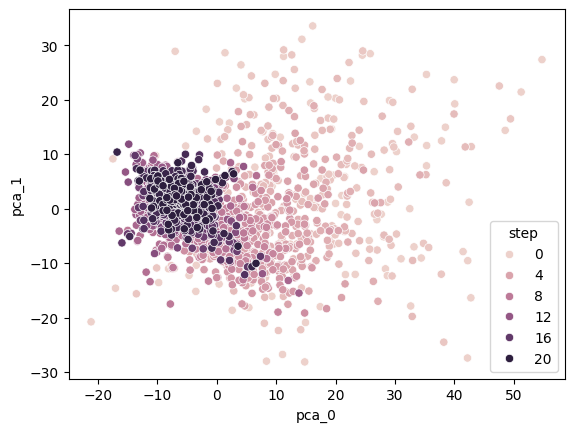

In [15]:
sns.scatterplot(df, x='pca_0', y='pca_1', hue='step')

<Axes: xlabel='vel_0', ylabel='vel_1'>

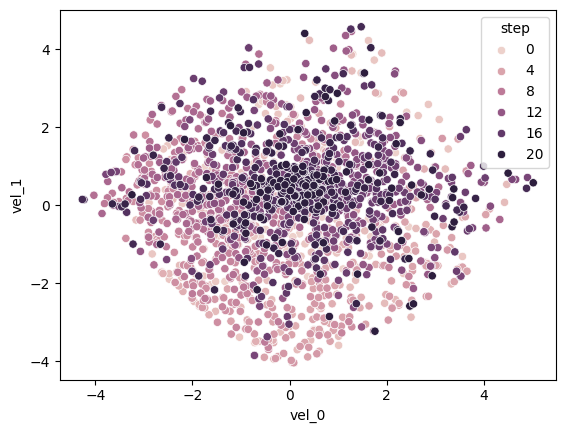

In [16]:
# visualize velocities

sns.scatterplot(df, x='vel_0', y='vel_1', hue='step')